<center><h1> Capstone Project - The Battle of Neighborhoods</h1></center>

<center><h2> Ahmedabad vs. Surat : Battle of Restaurants</h2></center>


### Part 1: Comparing Ahmedabad and Surat Restaurant Data

#### 1. Importing required libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

import geocoder

#### 2. loading restaurant data of both cities from zomato.csv file

In [2]:
df = pd.read_csv('Data/zomato.csv',encoding='ISO-8859-1')
df_india = df[df['country_id'] == 1]

#Ahmedabad
ahmd_df = df_india[df_india['city'] == 'Ahmedabad']
ahmd_df.reset_index(drop=True, inplace=True)
ahmd_df.head()

res_id            name      establishment  \
0  18757684      Ph Se Food  ['Casual Dining']   
1  18658177       Millhouse  ['Casual Dining']   
2  18663856  The Red Bistro  ['Casual Dining']   
3  18819827    Kadak Bhagat  ['Casual Dining']   
4  18718880   Urban Khichdi  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/ahmedabad/ph-se-food-bo...   
1  https://www.zomato.com/ahmedabad/millhouse-1-v...   
2  https://www.zomato.com/ahmedabad/the-red-bistr...   
3  https://www.zomato.com/ahmedabad/kadak-bhagat-...   
4  https://www.zomato.com/ahmedabad/urban-khichdi...   

                                             address       city  city_id  \
0  205-206, Silve Radiance, Sindhu Bhawan Road, P...  Ahmedabad       11   
1    3rd Floor, Alpha One Mall, Vastrapur, Ahmedabad  Ahmedabad       11   
2  Armeida, Sindhu Bhavan Road, Off SG Road, Boda...  Ahmedabad       11   
3  1, First Floor, Dev Aurum Complex, Deer Cirle,...  Ahmedabad       11   
4  A -103, Shivalik Plaza, Opposite AMA, IIM Road...  Ahmedabad       11   

                        locality   latitude  longitude zipcode  country_id  \
0                       Bodakdev  23.038755  72.510887  380054           1   
1  Ahmedabad One Mall, Vastrapur  23.039770  72.531508     NaN           1   
2                       Bodakdev  23.039852  72.509181     NaN           1   
3                  Prahlad Nagar  23.012411  72.514392     NaN           1   
4                      Vastrapur  23.028315  72.542458  380015           1   

                           locality_verbose                          cuisines  \
0                       Bodakdev, Ahmedabad  North Indian, Chinese, Fast Food   
1  Ahmedabad One Mall, Vastrapur, Ahmedabad              Continental, Italian   
2                       Bodakdev, Ahmedabad    Mexican, Italian, North Indian   
3                  Prahlad Nagar, Ahmedabad  North Indian, Chinese, Fast Food   
4                      Vastrapur, Ahmedabad         North Indian, Continental   

                                             timings  average_cost_for_two  \
0                          12noon â 11pm (Mon-Sun)                   900   
1                                     11 AM to 11 PM                  1200   
2  6:30 PM to 10:45 PM (Mon), 12 Noon to 10:45 PM...                  1400   
3                 11:30 AM to 3:30 PM, 7 PM to 11 PM                  1000   
4           Mon-Sun (12 Noon to 4 PM, 7 PM to 11 PM)                   600   

   price_range currency                                         highlights  \
0            3      Rs.  ['Dinner', 'Cash', 'Takeaway Available', 'Cred...   
1            3      Rs.  ['No Alcohol Available', 'Debit Card', 'Credit...   
2            3      Rs.  ['Lunch', 'Delivery', 'Debit Card', 'Dinner', ...   
3            3      Rs.  ['Credit Card', 'Dinner', 'Cash', 'Debit Card'...   
4            2      Rs.  ['Dinner', 'Delivery', 'Debit Card', 'Lunch', ...   

   aggregate_rating rating_text  votes  photo_count  opentable_support  \
0               4.5   Excellent   1434          773                0.0   
1               4.5   Excellent   1530          768                0.0   
2               4.6   Excellent    695          631                0.0   
3               4.4   Very Good    977          188                0.0   
4               4.7   Excellent    619          305                0.0   

   delivery  takeaway  
0        -1        -1  
1        -1        -1  
2        -1        -1  
3         1        -1  
4         1        -1

In [3]:
#Surat
surat_df = df_india[df_india['city'] == 'Surat']
surat_df.reset_index(drop=True, inplace=True)
surat_df.head()

res_id                     name        establishment  \
0  18017233                Bismillah  ['Dessert Parlour']   
1  18744566              Burger King      ['Quick Bites']   
2   3800696   Kailash Sweet & Snacks       ['Sweet Shop']   
3   3800583  Kailash Sweets & Snacks       ['Sweet Shop']   
4   3800420              Mahalakshmi    ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/surat/bismillah-new-tex...   
1  https://www.zomato.com/surat/burger-king-4-ada...   
2  https://www.zomato.com/surat/kailash-sweet-sna...   
3  https://www.zomato.com/surat/kailash-sweets-sn...   
4  https://www.zomato.com/surat/mahalakshmi-adaja...   

                                             address   city  city_id  \
0  Opposite Railway Station, Railway Station Area...  Surat       38   
1  Shop 4 & 5, Ground Floor, Valentina Business H...  Surat       38   
2    Shop 27, 28, 29, Rajhans Point, Varaccha, Surat  Surat       38   
3    Shrinathji Apartment,Timaliawad, Nanpura, Surat  Surat       38   
4  1, Muktanand Nagar Road, Near Gujarat Gas Circ...  Surat       38   

             locality   latitude  longitude zipcode  country_id  \
0  New Textile Market  21.204330  72.839818     NaN           1   
1          Adajan Gam  21.189176  72.789914     NaN           1   
2            Varaccha  21.208837  72.847075     NaN           1   
3             Nanpura  21.187163  72.814055     NaN           1   
4       Adajan Patiya  21.194577  72.801867     NaN           1   

            locality_verbose                        cuisines  \
0  New Textile Market, Surat         Beverages, North Indian   
1          Adajan Gam, Surat    Burger, Fast Food, Beverages   
2            Varaccha, Surat  Mithai, Street Food, Beverages   
3             Nanpura, Surat  Mithai, Beverages, Street Food   
4       Adajan Patiya, Surat               Fast Food, Juices   

                         timings  average_cost_for_two  price_range currency  \
0                   9 AM to 3 AM                   250            1      Rs.   
1                  8 AM to 11 PM                   500            2      Rs.   
2     7:30 AM to 10 PM (Mon-Sun)                   300            1      Rs.   
3  7:30 AM to 10:30 PM (Mon-Sun)                   300            1      Rs.   
4        9 AM to 11 PM (Mon-Sun)                   250            1      Rs.   

                                          highlights  aggregate_rating  \
0  ['Takeaway Available', 'Credit Card', 'Cash', ...               4.7   
1  ['Debit Card', 'No Alcohol Available', 'Dinner...               4.2   
2  ['Takeaway Available', 'No Alcohol Available',...               4.4   
3  ['Lunch', 'Takeaway Available', 'Breakfast', '...               4.4   
4  ['Lunch', 'Cash', 'No Alcohol Available', 'Din...               4.7   

  rating_text  votes  photo_count  opentable_support  delivery  takeaway  
0   Excellent    678           38                0.0         1        -1  
1   Very Good    717           38                0.0         1        -1  
2   Very Good    542           19                0.0        -1        -1  
3   Very Good    552           45                0.0        -1        -1  
4   Excellent   1452          110                0.0        -1        -1

#### 3. selecting only meaningful values of rating, latitude, longitude, etc...

In [4]:
ahmd= ahmd_df[ahmd_df.longitude !=0.000000][['name','locality','longitude','latitude','cuisines','aggregate_rating','rating_text','votes']]
surat= surat_df[surat_df.longitude !=0.000000][['name','locality','longitude','latitude','cuisines','aggregate_rating','rating_text','votes']]

In [5]:
ahmd = ahmd[ahmd['aggregate_rating'] !=0.0]
surat = surat[surat['aggregate_rating'] !=0.0]

In [6]:
ahmd.head()

name                       locality  longitude   latitude  \
0      Ph Se Food                       Bodakdev  72.510887  23.038755   
1       Millhouse  Ahmedabad One Mall, Vastrapur  72.531508  23.039770   
2  The Red Bistro                       Bodakdev  72.509181  23.039852   
3    Kadak Bhagat                  Prahlad Nagar  72.514392  23.012411   
4   Urban Khichdi                      Vastrapur  72.542458  23.028315   

                           cuisines  aggregate_rating rating_text  votes  
0  North Indian, Chinese, Fast Food               4.5   Excellent   1434  
1              Continental, Italian               4.5   Excellent   1530  
2    Mexican, Italian, North Indian               4.6   Excellent    695  
3  North Indian, Chinese, Fast Food               4.4   Very Good    977  
4         North Indian, Continental               4.7   Excellent    619

In [7]:
surat.head()

name            locality  longitude   latitude  \
0                Bismillah  New Textile Market  72.839818  21.204330   
1              Burger King          Adajan Gam  72.789914  21.189176   
2   Kailash Sweet & Snacks            Varaccha  72.847075  21.208837   
3  Kailash Sweets & Snacks             Nanpura  72.814055  21.187163   
4              Mahalakshmi       Adajan Patiya  72.801867  21.194577   

                         cuisines  aggregate_rating rating_text  votes  
0         Beverages, North Indian               4.7   Excellent    678  
1    Burger, Fast Food, Beverages               4.2   Very Good    717  
2  Mithai, Street Food, Beverages               4.4   Very Good    542  
3  Mithai, Beverages, Street Food               4.4   Very Good    552  
4               Fast Food, Juices               4.7   Excellent   1452

#### 4. plotting maps to show clusters of restaurants in both the cities

In [8]:
ahmd_Rest = folium.Map(location=[23.0, 72.5], zoom_start=12)

X = ahmd['latitude']
Y = ahmd['longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
ahmd['cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(ahmd['latitude'], ahmd['longitude'], ahmd['locality'], ahmd['cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(ahmd_Rest)  

ahmd_Rest

In [10]:
surat_Rest = folium.Map(location=[21.2, 72.8], zoom_start=12)

X = surat['latitude']
Y = surat['longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
surat['cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(surat['latitude'], surat['longitude'], surat['locality'], surat['cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(surat_Rest)  

surat_Rest

#### 5. bar charts to show the highest rated restaurants in each locality of the city

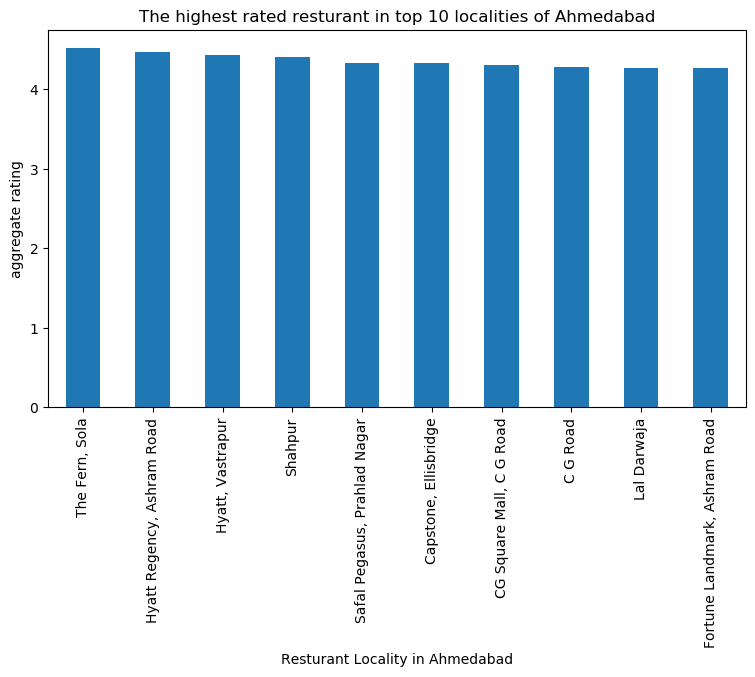

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 localities of Ahmedabad')
#On x-axis

#giving a bar plot
ahmd.groupby('locality')['aggregate_rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ahmedabad')
#On y-axis
plt.ylabel('aggregate rating')
#displays the plot
plt.show()

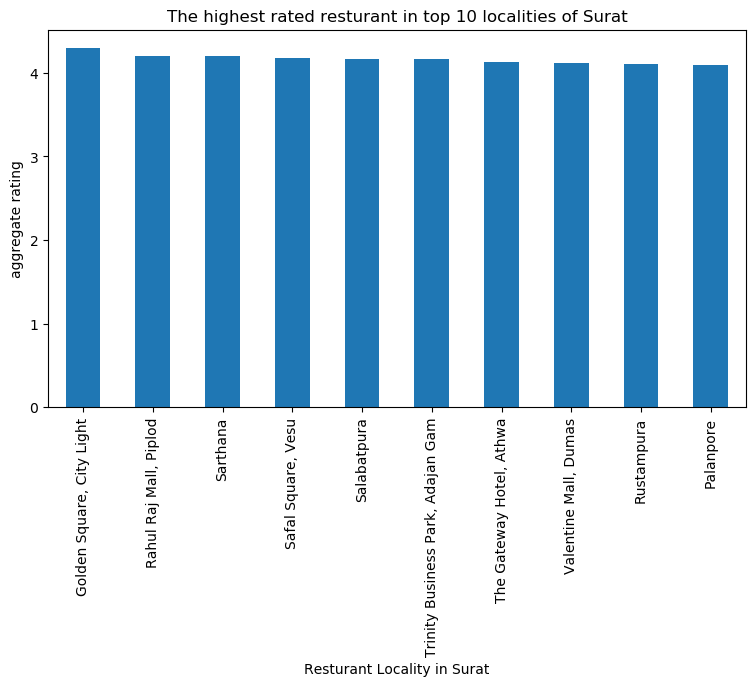

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 localities of Surat')
#On x-axis

#giving a bar plot
surat.groupby('locality')['aggregate_rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Surat')
#On y-axis
plt.ylabel('aggregate rating')
#displays the plot
plt.show()

#### 6. bar charts to show the highest number of restaurants in each locality of two cities

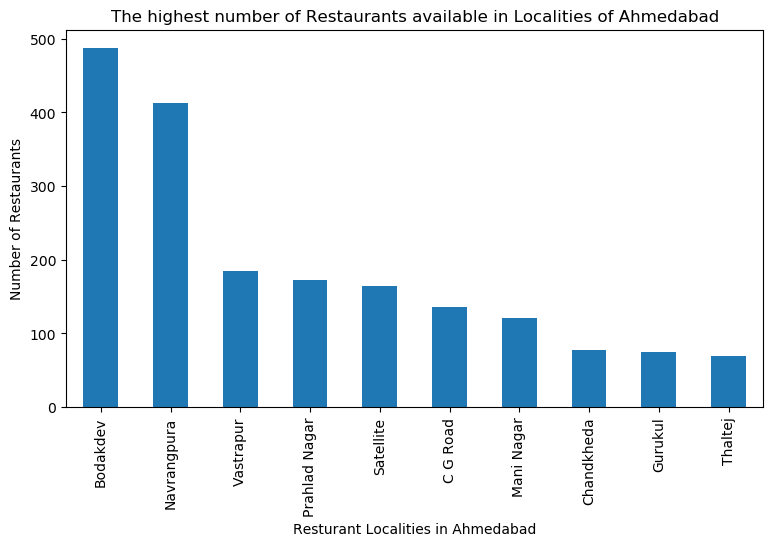

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurants available in Localities of Ahmedabad')
#On x-axis

#giving a bar plot
ahmd.groupby('locality')['name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Localities in Ahmedabad')
#On y-axis
plt.ylabel('Number of Restaurants')

#displays the plot
plt.show()

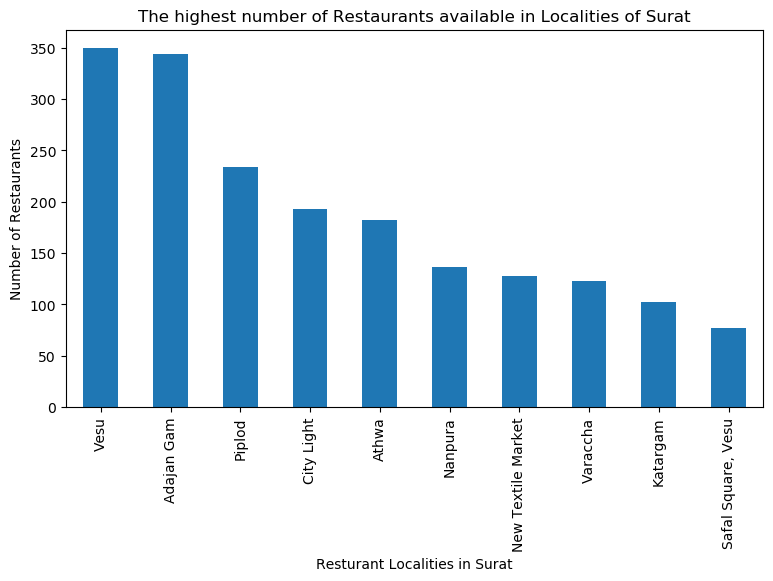

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurants available in Localities of Surat')
#On x-axis

#giving a bar plot
surat.groupby('locality')['name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Localities in Surat')
#On y-axis
plt.ylabel('Number of Restaurants')

#displays the plot
plt.show()

#### 7. bar charts to show the top 5 localities with highest number of Gujarati restaurants in both the cities

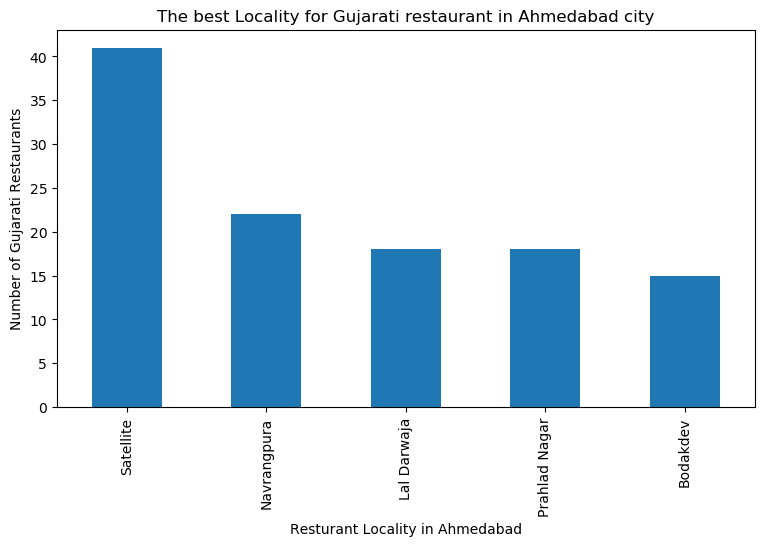

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Gujarati restaurant in Ahmedabad city')

#giving a bar plot
ahmd[ahmd.cuisines.str.contains('Gujarati',case=False)].groupby('locality')['name'].count().nlargest(5).plot(kind='bar')

#On x-axis
plt.xlabel('Resturant Locality in Ahmedabad')
#On y-axis
plt.ylabel('Number of Gujarati Restaurants')

#displays the plot
plt.show()

 #### Satellite is the locality with highest number of Gujarati cuisine restaurants in Ahmedabad

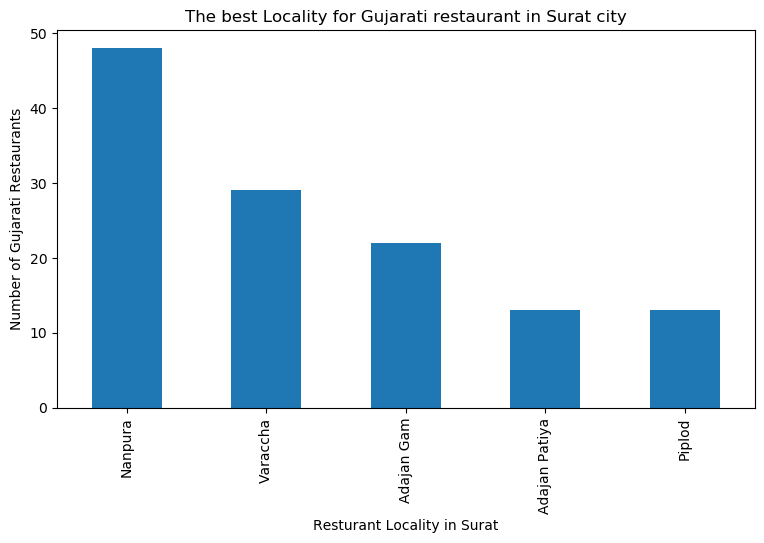

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Gujarati restaurant in Surat city')

#giving a bar plot
surat[surat.cuisines.str.contains('Gujarati',case=False, na=False)].groupby('locality')['name'].count().nlargest(5).plot(kind='bar')

#On x-axis
plt.xlabel('Resturant Locality in Surat')
#On y-axis
plt.ylabel('Number of Gujarati Restaurants')

#displays the plot
plt.show()

 #### Nanpura is the locality with highest number of Gujarati cuisine restaurants in Surat

#### 8. bar charts to show the top 5 rated gujarati cuisine restaurant localities in both cities

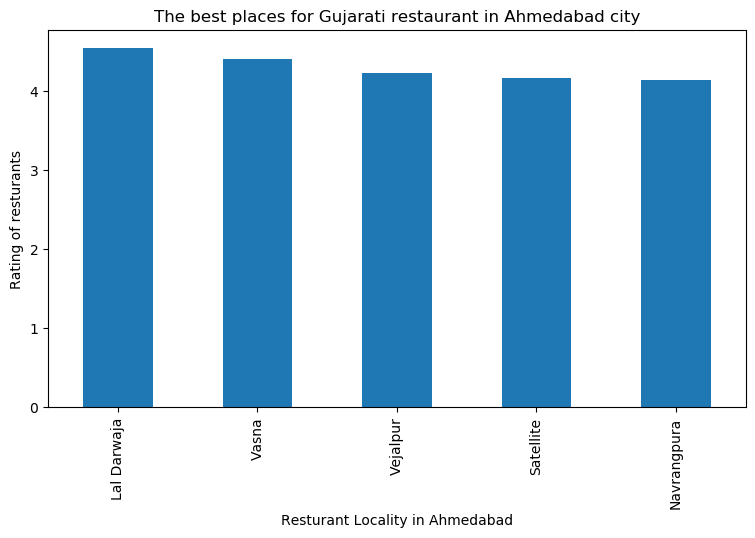

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Gujarati restaurant in Ahmedabad city')

#giving a bar plot
ahmd[ahmd.cuisines.str.contains('Gujarati',case=False)].groupby('locality')['aggregate_rating'].mean().nlargest(5).plot(kind='bar')

#On x-axis
plt.xlabel('Resturant Locality in Ahmedabad')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

#### as seen above, Lal Darwaja is the best locality in ahmedabad if you wish to have Gujarati Cuisine food

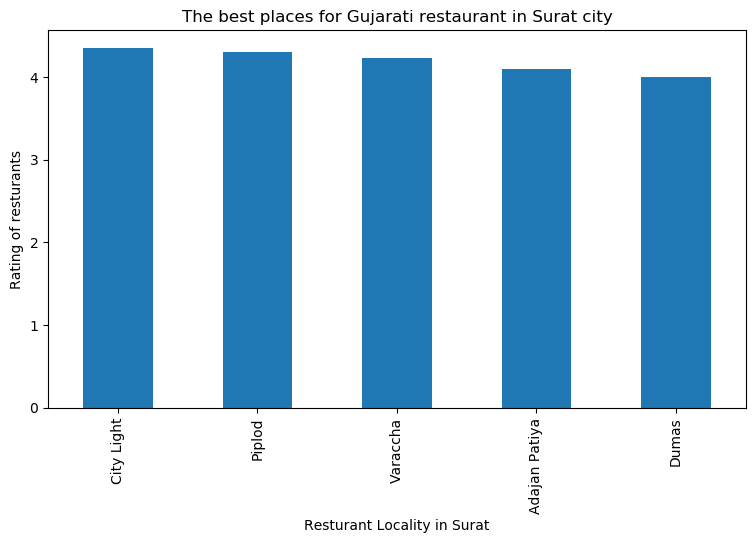

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Gujarati restaurant in Surat city')

#giving a bar plot
surat[surat.cuisines.str.contains('Gujarati',case=False, na=False)].groupby('locality')['aggregate_rating'].mean().nlargest(5).plot(kind='bar')

#On x-axis
plt.xlabel('Resturant Locality in Surat')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

#### as seen above, City Light is the best locality in surat if you wish to have Gujarati Cuisine food

### Part 2: Analysing neighbourhoods of both cities

#### 9. Grouping the data based on locality and getting latitudes and longitudes

In [84]:
df = pd.read_csv('Data/1.csv')
df

Postalcode    Borough                                       Neighborhood
0        380001  Ahmedabad  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...
1        380002  Ahmedabad               N C Market ,Railwaypura ,Revdibazar 
2        380004  Ahmedabad  Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ...
3        380005  Ahmedabad           Kabir Chowk ,Motera ,O N G C ,Sabarmati 
4        380006  Ahmedabad                            Ambawadi  ,Ellisbridge 
5        380007  Ahmedabad  Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...
6        380008  Ahmedabad  Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...
7        380009  Ahmedabad  Ashram Road ,Darpan Society ,Gujarat Universit...
8        380013  Ahmedabad  Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,S...
9        380014  Ahmedabad                                          Navjivan 
10       380015  Ahmedabad  Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...
11       380016  Ahmedabad  Asarwa Chakla ,Civil Hospital ,Meghaningar ,Pu...
12       380018  Ahmedabad                                          Saraspur 
13       380019  Ahmedabad                          D Cabin ,Railway Colony  
14       380021  Ahmedabad                         Gomtipur ,Rajpur Gomtipur 
15       380022  Ahmedabad  Behrampura ,Calico Mills ,Gita Mandir Road ,M ...
16       380023  Ahmedabad        Rakhial ,Rakhial Udyog Vistar ,Sukhrampura 
17       380024  Ahmedabad           Asarwa Ext South ,Bapunagar , Bapunagar 
18       380026  Ahmedabad                         Amraiwadi ,Ctm Char Rasta 
19       380027  Ahmedabad                                    Gandhi Ashram  
20       380028  Ahmedabad                  Bhairavnath Road ,Shah Alam Roza 
21       380050  Ahmedabad                                         Ghodasar  
22       380051  Ahmedabad                                       Jivraj Park 
23       380052  Ahmedabad                                          Memnagar 
24       380054  Ahmedabad                            Bodakdev ,Thaltej Road 
25       380055  Ahmedabad                                          Juhapura 
26       380058  Ahmedabad                        Ambli ,Bopal ,Ghuma ,Shela 
27       380059  Ahmedabad                                   Shilaj ,Thaltej 
28       380060  Ahmedabad                     Bhadaj ,Lapkaman ,Ognaj ,Sola 
29       380061  Ahmedabad                                         Ghatlodia 
30       380063  Ahmedabad                                        Sola H B C 
31       382110  Ahmedabad  Charel ,Daduka ,Fangadi ,Goraj ,Jamp ,Kaneti ,...
32       382115  Ahmedabad        Andej ,Chekhla ,Garodia ,Godhavi ,Nedharad 
33       382120  Ahmedabad  Abasana ,Dabhsar ,Dadhana ,Dekawada ,Detroj ,G...
34       382130  Ahmedabad  Dalod ,Dhedasana ,Endla ,Kadvasan ,Kunpur ,Man...
35       382140  Ahmedabad  Ashoknagar ,Bhadana ,Bhankoda ,Chhaniar ,Devpu...
36       382145  Ahmedabad  Balsasan ,Bamroli ,Bhoyani ,Chuval Dangarva ,K...
37       382150  Ahmedabad  Asalgam ,Bhojwa ,Bordibazar Viramgam ,Chandran...
38       382170  Ahmedabad  Bakrana ,Bol ,Chharodi ,Dodar ,Iawa (Vasna) ,J...
39       382210  Ahmedabad  Bakrol ,Bhat ,Fatewadi ,Kasindra ,Kolat ,Navap...
40       382213  Ahmedabad  Changodar ,Devtimoti ,Matoda ,Moraiya ,Vasna  ...
41       382220  Ahmedabad  Adroda ,Bavla Market Yard ,Bavla ,Bhayla ,Chha...
42       382225  Ahmedabad  Ambaliara ,Ambareli ,Dadusar ,Dholka ,Jalalpur...
43       382230  Ahmedabad  Arnej ,Bagodara ,Bholad ,Bhurkhi ,Dhingada ,Du...
44       382240  Ahmedabad  Baldana ,Bamsara ,Deo Dholera ,Dholi ,Gangad ,...
45       382245  Ahmedabad  Alampur ,Aniali ( K ) ,Bodia ,Devaliya ,Dharpi...
46       382250  Ahmedabad  Akru ,Chokdi ,Jeska ,Parabadi ,Polarpur ,Shahp...
47       382255  Ahmedabad  Alau ,Bagad ,Chandarva ,Godhavata ,Gunda ,Jali...
48       382260  Ahmedabad     Badarkha ,Chaloda ,Chandisar ,Kavitha ,Saroda 
49       382265  Ahmedabad  Ganol ,Ingoli ,Kauka ,Pisawada ,Simej ,Varna ,...
50       382315  Ahmedabad 

In [44]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pgeocode
import geocoder

In [88]:
# function to get latitudes and longitudes of neighborhoods
def get_latitlongit(postalcode):
    latitlongit_coords = None
    while(latitlongit_coords is None):
        g = geocoder.arcgis('{}, Gujarat, India'.format(postalcode))
        latitlongit_coords = g.latlng
    return latitlongit_coords
    
get_latitlongit('380008')

[22.99602500000003, 72.60980975000007]

In [59]:
nomi = pgeocode.Nominatim('in')
nomi.query_postal_code("380008")

postal_code                                                  380008
country code                                                     IN
place_name        Vasisthnagar, Daxini Society, Maninagar, Khokh...
state_name                                                  Gujarat
state_code                                                        9
county_name                                               Ahmedabad
county_code                                                     474
community_name                                       Ahmadabad City
community_code                                                  NaN
latitude                                                    22.9911
longitude                                                   72.6108
accuracy                                                          3
Name: 0, dtype: object

In [89]:
postalcodes = df['Postalcode']

In [90]:
coords = [ get_latitlongit(postalcode) for postalcode in postalcodes.tolist() ]

In [92]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']
df

Postalcode    Borough                                       Neighborhood  \
0        380001  Ahmedabad  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...   
1        380002  Ahmedabad               N C Market ,Railwaypura ,Revdibazar    
2        380004  Ahmedabad  Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ...   
3        380005  Ahmedabad           Kabir Chowk ,Motera ,O N G C ,Sabarmati    
4        380006  Ahmedabad                            Ambawadi  ,Ellisbridge    
5        380007  Ahmedabad  Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...   
6        380008  Ahmedabad  Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...   
7        380009  Ahmedabad  Ashram Road ,Darpan Society ,Gujarat Universit...   
8        380013  Ahmedabad  Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,S...   
9        380014  Ahmedabad                                          Navjivan    
10       380015  Ahmedabad  Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...   
11       380016  Ahmedabad  Asarwa Chakla ,Civil Hospital ,Meghaningar ,Pu...   
12       380018  Ahmedabad                                          Saraspur    
13       380019  Ahmedabad                          D Cabin ,Railway Colony     
14       380021  Ahmedabad                         Gomtipur ,Rajpur Gomtipur    
15       380022  Ahmedabad  Behrampura ,Calico Mills ,Gita Mandir Road ,M ...   
16       380023  Ahmedabad        Rakhial ,Rakhial Udyog Vistar ,Sukhrampura    
17       380024  Ahmedabad           Asarwa Ext South ,Bapunagar , Bapunagar    
18       380026  Ahmedabad                         Amraiwadi ,Ctm Char Rasta    
19       380027  Ahmedabad                                    Gandhi Ashram     
20       380028  Ahmedabad                  Bhairavnath Road ,Shah Alam Roza    
21       380050  Ahmedabad                                         Ghodasar     
22       380051  Ahmedabad                                       Jivraj Park    
23       380052  Ahmedabad                                          Memnagar    
24       380054  Ahmedabad                            Bodakdev ,Thaltej Road    
25       380055  Ahmedabad                                          Juhapura    
26       380058  Ahmedabad                        Ambli ,Bopal ,Ghuma ,Shela    
27       380059  Ahmedabad                                   Shilaj ,Thaltej    
28       380060  Ahmedabad                     Bhadaj ,Lapkaman ,Ognaj ,Sola    
29       380061  Ahmedabad                                         Ghatlodia    
30       380063  Ahmedabad                                        Sola H B C    
31       382110  Ahmedabad  Charel ,Daduka ,Fangadi ,Goraj ,Jamp ,Kaneti ,...   
32       382115  Ahmedabad        Andej ,Chekhla ,Garodia ,Godhavi ,Nedharad    
33       382120  Ahmedabad  Abasana ,Dabhsar ,Dadhana ,Dekawada ,Detroj ,G...   
34       382130  Ahmedabad  Dalod ,Dhedasana ,Endla ,Kadvasan ,Kunpur ,Man...   
35       382140  Ahmedabad  Ashoknagar ,Bhadana ,Bhankoda ,Chhaniar ,Devpu...   
36       382145  Ahmedabad  Balsasan ,Bamroli ,Bhoyani ,Chuval Dangarva ,K...   
37       382150  Ahmedabad  Asalgam ,Bhojwa ,Bordibazar Viramgam ,Chandran...   
38       382170  Ahmedabad  Bakrana ,Bol ,Chharodi ,Dodar ,Iawa (Vasna) ,J...   
39       382210  Ahmedabad  Bakrol ,Bhat ,Fatewadi ,Kasindra ,Kolat ,Navap...   
40       382213  Ahmedabad  Changodar ,Devtimoti ,Matoda ,Moraiya ,Vasna  ...   
41       382220  Ahmedabad  Adroda ,Bavla Market Yard ,Bavla ,Bhayla ,Chha...   
42       382225  Ahmedabad  Ambaliara ,Ambareli ,Dadusar ,Dholka ,Jalalpur...   
43       382230  Ahmedabad  Arnej ,Bagodara ,Bholad ,Bhurkhi ,Dhingada ,Du...   
44       382240  Ahmedabad  Baldana ,Bamsara ,Deo Dholera ,Dholi ,Gangad ,...   
45       382245  Ahmedabad  Alampur ,Aniali ( K ) ,Bodia ,Devaliya ,Dharpi...   
46       382250  Ahmedabad  Akru ,Chokdi ,Jeska ,Parabadi ,Polarpur ,Shahp...   
47       382255  Ahmedabad  Alau ,Bagad ,Chandarva ,Godhavata ,Gunda ,Jali...   
48       382260  Ahmedabad     Badar

In [98]:
df_a = df[:79]
df_a

Postalcode    Borough                                       Neighborhood  \
0       380001  Ahmedabad  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...   
1       380002  Ahmedabad               N C Market ,Railwaypura ,Revdibazar    
2       380004  Ahmedabad  Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ...   
3       380005  Ahmedabad           Kabir Chowk ,Motera ,O N G C ,Sabarmati    
4       380006  Ahmedabad                            Ambawadi  ,Ellisbridge    
5       380007  Ahmedabad  Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...   
6       380008  Ahmedabad  Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...   
7       380009  Ahmedabad  Ashram Road ,Darpan Society ,Gujarat Universit...   
8       380013  Ahmedabad  Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,S...   
9       380014  Ahmedabad                                          Navjivan    
10      380015  Ahmedabad  Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...   
11      380016  Ahmedabad  Asarwa Chakla ,Civil Hospital ,Meghaningar ,Pu...   
12      380018  Ahmedabad                                          Saraspur    
13      380019  Ahmedabad                          D Cabin ,Railway Colony     
14      380021  Ahmedabad                         Gomtipur ,Rajpur Gomtipur    
15      380022  Ahmedabad  Behrampura ,Calico Mills ,Gita Mandir Road ,M ...   
16      380023  Ahmedabad        Rakhial ,Rakhial Udyog Vistar ,Sukhrampura    
17      380024  Ahmedabad           Asarwa Ext South ,Bapunagar , Bapunagar    
18      380026  Ahmedabad                         Amraiwadi ,Ctm Char Rasta    
19      380027  Ahmedabad                                    Gandhi Ashram     
20      380028  Ahmedabad                  Bhairavnath Road ,Shah Alam Roza    
21      380050  Ahmedabad                                         Ghodasar     
22      380051  Ahmedabad                                       Jivraj Park    
23      380052  Ahmedabad                                          Memnagar    
24      380054  Ahmedabad                            Bodakdev ,Thaltej Road    
25      380055  Ahmedabad                                          Juhapura    
26      380058  Ahmedabad                        Ambli ,Bopal ,Ghuma ,Shela    
27      380059  Ahmedabad                                   Shilaj ,Thaltej    
28      380060  Ahmedabad                     Bhadaj ,Lapkaman ,Ognaj ,Sola    
29      380061  Ahmedabad                                         Ghatlodia    
30      380063  Ahmedabad                                        Sola H B C    
31      382110  Ahmedabad  Charel ,Daduka ,Fangadi ,Goraj ,Jamp ,Kaneti ,...   
32      382115  Ahmedabad        Andej ,Chekhla ,Garodia ,Godhavi ,Nedharad    
33      382120  Ahmedabad  Abasana ,Dabhsar ,Dadhana ,Dekawada ,Detroj ,G...   
34      382130  Ahmedabad  Dalod ,Dhedasana ,Endla ,Kadvasan ,Kunpur ,Man...   
35      382140  Ahmedabad  Ashoknagar ,Bhadana ,Bhankoda ,Chhaniar ,Devpu...   
36      382145  Ahmedabad  Balsasan ,Bamroli ,Bhoyani ,Chuval Dangarva ,K...   
37      382150  Ahmedabad  Asalgam ,Bhojwa ,Bordibazar Viramgam ,Chandran...   
38      382170  Ahmedabad  Bakrana ,Bol ,Chharodi ,Dodar ,Iawa (Vasna) ,J...   
39      382210  Ahmedabad  Bakrol ,Bhat ,Fatewadi ,Kasindra ,Kolat ,Navap...   
40      382213  Ahmedabad  Changodar ,Devtimoti ,Matoda ,Moraiya ,Vasna  ...   
41      382220  Ahmedabad  Adroda ,Bavla Market Yard ,Bavla ,Bhayla ,Chha...   
42      382225  Ahmedabad  Ambaliara ,Ambareli ,Dadusar ,Dholka ,Jalalpur...   
43      382230  Ahmedabad  Arnej ,Bagodara ,Bholad ,Bhurkhi ,Dhingada ,Du...   
44      382240  Ahmedabad  Baldana ,Bamsara ,Deo Dholera ,Dholi ,Gangad ,...   
45      382245  Ahmedabad  Alampur ,Aniali ( K ) ,Bodia ,Devaliya ,Dharpi...   
46      382250  Ahmedabad  Akru ,Chokdi ,Jeska ,Parabadi ,Polarpur ,Shahp...   
47      382255  Ahmedabad  Alau ,Bagad ,Chandarva ,Godhavata ,Gunda ,Jali...   
48      382260  Ahmedabad     Badarkha ,Chaloda ,Chandisar ,Kavitha ,Saroda    
49  

In [99]:
df_s = df[79:]
df_s.index = range(len(df_s))
df_s

Postalcode Borough                                       Neighborhood  \
0       392150   Surat                                             Ankhi    
1       393050   Surat                                   Borda ,Kuilivel    
2       393125   Surat                                           Sabaria    
3       393130   Surat                                             Babda    
4       394101   Surat                                     Mota Varachha    
5       394105   Surat                          Utran ,Utran Power House    
6       394107   Surat                     Amroli ,Chhapra Bhatha ,Kosad    
7       394110   Surat  Anita ,Borsad ,Dhrampur ,Dungri ,G.I.P.C.L. ,K...   
8       394111   Surat                                    Kim Char Rasta    
9       394120   Surat  Kosamba Bazar ,Kosamba ,Kunvarda ,Panjroli ,Sava    
10      394125   Surat  Bharan ,Boridra ,Dhamdod ,Dinod ,Hathuran ,Mah...   
11      394130   Surat  Atodara ,Bharundi ,Gothan ,Karmala ,Madhar ,Mo...   
12      394140   Surat                Bodhan  ,Gavachhi ,Munjlav ,Vareli    
13      394150   Surat  Abrama ,Antroli ,Dhoranpardi ,Kathor ,Navipard...   
14      394155   Surat                             Ghala ,Karjan ,Virpur    
15      394160   Surat  Dadhwada ,Fulwadi ,Ghantoli ,Goddha ,Jakhala ,...   
16      394163   Surat  Amalsadi ,Amba ,Fali ,Gamtalv Bujrang ,Godawad...   
17      394170   Surat  Antroli ,Areth ,Nogama ,Roswad ,Tadkeshwar ,Vegi    
18      394180   Surat  Dhatva ,Dungra ,Kamrej ,Kholeshwar ,Kolibharth...   
19      394185   Surat                        Kamrej Char Rasta ,Navagam    
20      394190   Surat                                           Kholvad    
21      394210   Surat  Bamroli ,Bhedvad ,Budia ,Deladva ,Devadh ,Dind...   
22      394221   Surat                                         Pandesara    
23      394230   Surat  Bonandh ,Eklera ,Gabheni ,Kanakpur ,Kansad ,Li...   
24      394235   Surat                 Kachholi ,Kafleta ,Lajpore ,Popda    
25      394240   Surat  Bartad ,Dungri ,Gunesvel ,Karchelia ,Naldhara ...   
26      394245   Surat               Ghadoi ,Kharvan ,Velanpur ,Zervavra    
27      394246   Surat  Algat ,Bhagvanpura ,Jamania ,Kadhaiya ,Sugar F...   
28      394248   Surat  Bhoria ,Butwada ,Dhamkhadi ,Haladva ,Kankaria ...   
29      394250   Surat  Amchak ,Bilkhadi ,Dedvasan ,Dholikui ,Kodada ,...   
30      394270   Surat                               Hajira ,Nandniketan    
31      394305   Surat  Bagumara ,Chalthan ,Jolwa ,Karan ,Mohni ,Tatit...   
32      394310   Surat  Barasado ,Dastan ,Ena ,Gangadhara RS ,Haldharu...   
33      394315   Surat  Italva ,Kanav ,Malekpor ,Palsana  ,Samrod ,Taraj    
34      394317   Surat                          Baleshwar ,Vadadla Tanti    
35      394320   Surat  Asta ,Chikhali Dungar ,Khanpur ,Nagod ,Segva ,...   
36      394325   Surat  Antroli ,Ladvi ,Mankna ,Morthana ,Niol ,Parab ...   
37      394326   Surat          Jokha ,Kathodara ,Kosmadi ,Vav Kathodara    
38      394327   Surat                                          Kadodara    
39      394330   Surat               Delad ,Digas ,Orna ,Shampura ,Timba    
40      394335   Surat  Bamni ,Bhamaiya ,Haripura ,Kadod ,Kamlapore ,K...   
41      394340   Surat  Balda ,Bedkuva ,Dhamodla ,Kalamkui ,Kantifalia...   
42      394345   Surat                                     Mota ,Umarakh    
43      394350   Surat  Amalsadi ,Chhitra ,Goji ,Kani ,Naugama ,Ninat ...   
44      394352   Surat                          Ambheti ,Lakhanpur ,Puni    
45      394355   Surat  Akoti ,Dhamdod Lumbha ,Kharvasa ,Khojpardi ,Mo...   
46      394360   Surat  Bedkuvadoor ,Ghasiamedha ,Kakrapar ,Panchpipla...   
47      394365   Surat  Amalgundi ,Doswada ,Gopalpura ,Gunkhadi ,Hindl...   
48      394370   Surat  Bhljamboli ,Bortha ,Gujarpur ,Khorda ,Laxmikhe...   
49      394375   Surat  Babarghat ,Bhadbhunja ,Bhitkhurd ,Chhapti ,Chh...   
50      394380   Surat  Amoda ,Chirmati ,Chokhiamli ,Gangtha ,Hathoda ...   


#### 10. plotting maps to show all the neighborhoods of both cities

In [93]:
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

from geopy.geocoders import Nominatim

In [102]:
geolocator = Nominatim()
city ="Ahmedabad"
city1 = "Surat"
country ="India"
loc = geolocator.geocode(city+','+ country)
loc1 = geolocator.geocode(city1+','+ country)
print("Ahmedabad City latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)
print("Surat City latitude is :-" ,loc1.latitude,"\nlongtitude is:-" ,loc1.longitude)

D:\Python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


Ahmedabad City latitude is :- 23.0216238 
longtitude is:- 72.5797068
Surat City latitude is :- 21.1864607 
longtitude is:- 72.8081281


In [103]:
map_ahmd = folium.Map(location=[loc.latitude, loc.longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neigh in zip(df_a['Latitude'], df_a['Longitude'], df_a['Borough'], df_a['Neighborhood']):
    label = '{}, {}'.format(neigh, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ahmd)  
    
map_ahmd

In [104]:
map_surat = folium.Map(location=[loc1.latitude, loc1.longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neigh in zip(df_s['Latitude'], df_s['Longitude'], df_s['Borough'], df_s['Neighborhood']):
    label = '{}, {}'.format(neigh, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_surat)  
    
map_surat

#### 11. finding the 

In [105]:
CLIENT_ID = 'LFND0XA1FD301DJVA2CMJIKTABLS0X2LZFJ3GYCOCG51UF2I' # your Foursquare ID
CLIENT_SECRET = '4ZSQLQXWQZBHQ5OFNKDNENJIAFAM25F53WTZSKNF1J2LRHDX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LFND0XA1FD301DJVA2CMJIKTABLS0X2LZFJ3GYCOCG51UF2I
CLIENT_SECRET:4ZSQLQXWQZBHQ5OFNKDNENJIAFAM25F53WTZSKNF1J2LRHDX


In [108]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [109]:
ahmd_venues = getNearbyVenues(names= df_a['Neighborhood'],
                                   latitudes=df_a['Latitude'],
                                   longitudes=df_a['Longitude']
                                  )

Dariapur  ,District Court  ,Gandhi Road  ,Gheekanta Road ,Jamalpur  ,Kalupur Chakla ,Khadia ,Khanpur  ,Lal Darwaja ,Manek Chowk ,Municipal Corporation ,Raikhad ,Raipur  ,Ahmedabad G.. 
N C Market ,Railwaypura ,Revdibazar 
Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ,Girdharnagar ,Madhupura Market ,Shahibag ,Shahpur  ,Sub Foreign 
Kabir Chowk ,Motera ,O N G C ,Sabarmati 
Ambawadi  ,Ellisbridge 
Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Road ,Shardanagar 
Daxini Society ,Jawahar Chowk ,Khokhara Mehmadabad ,L G Hospital ,Maninagar , Mills ,Vasisthnagar 
Ashram Road ,Darpan Society ,Gujarat University ,Navrangpura 
Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,Stadium Marg ,Vadaj 
Navjivan 
Azad Society ,I I M ,Jodhpur Char Rasta ,Manekbag ,Polytechnic  , C 
Asarwa Chakla ,Civil Hospital ,Meghaningar ,Public Office  
Saraspur 
D Cabin ,Railway Colony  
Gomtipur ,Rajpur Gomtipur 
Behrampura ,Calico Mills ,Gita Mandir Road ,M D Marg 
Rakhial ,Rakhial Udyog Vistar ,Sukhrampura 
Asarwa Ext S

In [110]:
surat_venues = getNearbyVenues(names = df_s['Neighborhood'],
                                       latitudes=df_s['Latitude'],
                                       longitudes=df_s['Longitude']
                                  )

Ankhi 
Borda ,Kuilivel 
Sabaria 
Babda 
Mota Varachha 
Utran ,Utran Power House 
Amroli ,Chhapra Bhatha ,Kosad 
Anita ,Borsad ,Dhrampur ,Dungri ,G.I.P.C.L. ,Karanj ,Kim ,Kothwa ,Kudsad ,Limodra ,Mota Borsara ,Mulad ,Nani Naroli ,Pipodara ,Siyalaj ,Vadoli ,Varethi 
Kim Char Rasta 
Kosamba Bazar ,Kosamba ,Kunvarda ,Panjroli ,Sava 
Bharan ,Boridra ,Dhamdod ,Dinod ,Hathuran ,Mahuvej ,Nandav 
Atodara ,Bharundi ,Gothan ,Karmala ,Madhar ,Morthana ,Paria ,Sandhier ,Sayan ,Segva ,Sithan ,Syadla ,Umra 
Bodhan  ,Gavachhi ,Munjlav ,Vareli 
Abrama ,Antroli ,Dhoranpardi ,Kathor ,Navipardi ,Velanja 
Ghala ,Karjan ,Virpur 
Dadhwada ,Fulwadi ,Ghantoli ,Goddha ,Jakhala ,Jamankuva ,Kakarapargam ,Kim Dungara ,Lakhgam ,Mandvi SR ,Moritha ,Regama ,Rupan ,Salaiya ,Sarkui ,Sathvav ,Tarsada ,Vareth 
Amalsadi ,Amba ,Fali ,Gamtalv Bujrang ,Godawadi ,Godsamba ,Karvali ,Kasal ,Kharoli ,Khodamba ,Nandpore ,Naren ,Patal ,Puna ,Tuked ,Unteva ,Zab 
Antroli ,Areth ,Nogama ,Roswad ,Tadkeshwar ,Vegi 
Dhatva ,Dungra ,Kamr

In [111]:
print(ahmd_venues.shape)
ahmd_venues.head()

(117, 7)


Neighborhood  Neighborhood Latitude  \
0  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...              23.020795   
1  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...              23.020795   
2  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...              23.020795   
3  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...              23.020795   
4               N C Market ,Railwaypura ,Revdibazar               23.028740   

   Neighborhood Longitude                  Venue  Venue Latitude  \
0               72.589469  Manek Chowk Khau Gali       23.023505   
1               72.589469            Manek Chowk       23.023626   
2               72.589469            Jama Masjid       23.024323   
3               72.589469              Lucky Tea       23.016723   
4               72.595902             Moti Mahal       23.029120   

   Venue Longitude        Venue Category  
0        72.588539           Snack Place  
1        72.588553  Fast Food Restaurant  
2        72.587042         Historic Site  
3        72.590728              Tea Room  
4        72.599724     Indian Restaurant

In [174]:
ahmd_rest = ahmd_venues[(ahmd_venues['Venue Category'].str.contains('Restaurant'))] 
ahmd_rest

Neighborhood  Neighborhood Latitude  \
1    Dariapur  ,District Court  ,Gandhi Road  ,Ghee...              23.020795   
4                 N C Market ,Railwaypura ,Revdibazar               23.028740   
6                 N C Market ,Railwaypura ,Revdibazar               23.028740   
7                 N C Market ,Railwaypura ,Revdibazar               23.028740   
12                             Ambawadi  ,Ellisbridge               23.028100   
13                             Ambawadi  ,Ellisbridge               23.028100   
19   Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...              23.001920   
20   Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...              22.996025   
21   Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...              22.996025   
22   Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...              22.996025   
26   Ashram Road ,Darpan Society ,Gujarat Universit...              23.033655   
32   Ashram Road ,Darpan Society ,Gujarat Universit...              23.033655   
39                                           Navjivan               23.043528   
47   Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...              23.024915   
55            Asarwa Ext South ,Bapunagar , Bapunagar               23.038441   
63                                     Gandhi Ashram                23.063030   
64                                     Gandhi Ashram                23.063030   
65                                     Gandhi Ashram                23.063030   
69                                           Memnagar               23.050094   
70                                           Memnagar               23.050094   
73                                           Memnagar               23.050094   
74                             Bodakdev ,Thaltej Road               23.039491   
76                             Bodakdev ,Thaltej Road               23.039491   
77                             Bodakdev ,Thaltej Road               23.039491   
78                             Bodakdev ,Thaltej Road               23.039491   
79                             Bodakdev ,Thaltej Road               23.039491   
85                                          Ghatlodia               23.070520   
86                                          Ghatlodia               23.070520   
87   Changodar ,Devtimoti ,Matoda ,Moraiya ,Vasna  ...              22.905600   
88   Changodar ,Devtimoti ,Matoda ,Moraiya ,Vasna  ...              22.905600   
98                     Odhav Industrial Estate ,Odhav               23.026300   
99                                            Vastral               22.999915   
104                                           Isanpur               22.981875   
111                                             Ranip               23.076833   
113                     Chandlodia ,Gota ,Nirnaynagar               23.092556   

     Neighborhood Longitude                 Venue  Venue Latitude  \
1                 72.589469           Manek Chowk       23.023626   
4                 72.595902            Moti Mahal       23.029120   
6                 72.595902    Noorani Bara Handi       23.029779   
7                 72.595902               Charwad       23.030730   
12                72.566822        Pleasure Trove       23.027494   
13                72.566822         Jungle Bhookh       23.023703   
19                72.553872                Honest       23.005630   
20                72.609810          Mirch masala       22.997299   
21                72.609810      Prince Pav Bhaji       22.995150   
22                72.609810         Havmor Eatery       22.999315   
26                72.552062                 Amazo       23.034902   
32                72.552062         Cellad Eatery       23.030486   
39                72.567635   Oshwal Fafda/Jalebi       23.040552   
47                72.525286          Jaymal Fatta       23.020900   
55                72.630340               Sankalp       23.039934   
63                72.

In [112]:
print(surat_venues.shape)
surat_venues.head()

(53, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          Ankhi               22.050710               72.801950   
1          Ankhi               22.050710               72.801950   
2  Mota Varachha               21.239115               72.878771   
3  Mota Varachha               21.239115               72.878771   
4        Kholvad               21.274205               72.944767   

                    Venue  Venue Latitude  Venue Longitude      Venue Category  
0           Axis Bank ATM       22.052799        72.801804                 ATM  
1                Jambusar       22.051979        72.805171  Athletics & Sports  
2  Shreedama Technologies       21.236540        72.875847         IT Services  
3               Seo-Surat       21.236495        72.875855         IT Services  
4            Kholwad Gaam       21.278104        72.946400                Farm

In [172]:
surat_rest = surat_venues[(surat_venues['Venue Category'].str.contains('Restaurant')) ] 
surat_rest

Neighborhood  Neighborhood Latitude  \
16                                        Ongc Nagar               21.148780   
20                         Bhimpore ,Dumas ,Dumasgam               21.089875   
21                         Bhimpore ,Dumas ,Dumasgam               21.089875   
29  Inderpura ,Khatodara ,Rustampura  ,Sagrampura ...              21.181295   
30  Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidhar...              21.197670   
34  Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,...              21.231600   
45  Adajan Dn ,Anand Mahal Road ,Navyug College ,P...              21.199195   

    Neighborhood Longitude                         Venue  Venue Latitude  \
16               72.762435                     Ma Ma Mia       21.146597   
20               72.721415                       Nawab's       21.092127   
21               72.721415                Nawaabs Garden       21.092172   
29               72.833382  Moti Mahal Deluxe Restaurant       21.183024   
30               72.829612                  Khavdra Gali       21.196907   
34               72.818487                  Sunrise Dosa       21.232313   
45               72.781124                   Food safari       21.196552   

    Venue Longitude                 Venue Category  
16        72.766450             Italian Restaurant  
20        72.724915              Indian Restaurant  
21        72.725113              Indian Restaurant  
29        72.829493              Indian Restaurant  
30        72.829989              Indian Restaurant  
34        72.821251           Fast Food Restaurant  
45        72.784800  Vegetarian / Vegan Restaurant

In [181]:
ahmd_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Ambawadi  ,Ellisbridge                                                  5   
Ambli ,Bopal ,Ghuma ,Shela                                              1   
Amraiwadi ,Ctm Char Rasta                                               1   
Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Road...                      4   
Asarwa Ext South ,Bapunagar , Bapunagar                                 4   
Ashram Road ,Darpan Society ,Gujarat University...                      8   
Azad Society ,I I M ,Jodhpur Char Rasta ,Manekb...                      5   
Behrampura ,Calico Mills ,Gita Mandir Road ,M D...                      2   
Bodakdev ,Thaltej Road                                                  7   
Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ,...                      1   
Chandkheda ,Chandkheda Society Area                                     1   
Chandlodia ,Gota ,Nirnaynagar                                           5   
Changodar ,Devtimoti ,Matoda ,Moraiya ,Vasna  C...                      2   
Dariapur  ,District Court  ,Gandhi Road  ,Gheek...                      4   
Daxini Society ,Jawahar Chowk ,Khokhara Mehmada...                      5   
Digvijaynagar ,Jagatpur ,Kali ,Tragad                                   1   
Gandhi Ashram                                                           6   
Ghatlodia                                                               4   
Gomtipur ,Rajpur Gomtipur                                               1   
Gyaspur ,Lambha ,Narol ,Saijpur ,Shahwadi                               2   
Hathijan ,Vatva Industrial Estate ,Vinzol ,Vive...                      1   
Isanpur                                                                 2   
Jivraj Park                                                             3   
Juhapura                                                                1   
Kabir Chowk ,Motera ,O N G C ,Sabarmati                                 2   
Khodiyarnagar ,Nikol ,T B Nagar                                         2   
Krishnanagar  ,N C Mills ,Naroda Road ,Saijpur ...                      3   
Memnagar                                                                5   
N C Market ,Railwaypura ,Revdibazar                                     4   
Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,St...                      2   
Navjivan                                                                8   
Odhav Industrial Estate ,Odhav                                          3   
Rakhial ,Rakhial Udyog Vistar ,Sukhrampura                              2   
Ranip                                                                   2   
Saraspur                                                                2   
Sardarnagar                                                             2   
Vastral                                                                 3   
Vatva                                                                   1   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Ambawadi  ,Ellisbridge                                                   5   
Ambli ,Bopal ,Ghuma ,Shela                                               1   
Amraiwadi ,Ctm Char Rasta                                                1   
Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Road...                       4   
Asarwa Ext South ,Bapunagar , Bapunagar                                  4   
Ashram Road ,Darpan Society ,Gujarat University...                       8   
Azad Society ,I I M ,Jodhpur Char Rasta ,Manekb...                       5   
Behrampura ,Calico Mills ,Gita Mandir Road ,M D...                       2   
Bodakdev ,Thaltej Road                                                   7   
Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ,...                       1   
Chandkheda ,Chandkheda Society Area

In [182]:
surat_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
A. K. Road ,Fulpada                                                     1   
Adajan Dn ,Anand Mahal Road ,Navyug College ,Pa...                      4   
Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidharp...                      4   
Althan                                                                  1   
Ambheta ,Ariana ,Barbodhan ,Bhandut ,Bhesan ,Di...                      2   
Ankhi                                                                   2   
Athwalines ,Gopipura ,Govt. Medical College ,Na...                      5   
Bardoli ,Sardarbaug (Bardoli) ,Sugar Factory Ba...                      2   
Bhatlai ,Damka ,Mora  ,Suvali ,Vasava                                   1   
Bhestan                                                                 2   
Bhimpore ,Dumas ,Dumasgam                                               5   
Bombay Market ,Kumbharia ,Parvat Patia ,Saroli                          1   
Bonandh ,Eklera ,Gabheni ,Kanakpur ,Kansad ,Lin...                      3   
Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,M...                      5   
Godadara ,Limbayat,Parvat                                               3   
Inderpura ,Khatodara ,Rustampura  ,Sagrampura P...                      1   
Kadodara                                                                3   
Kholvad                                                                 1   
Mota Varachha                                                           2   
Ongc Nagar                                                              4   
Pandesara                                                               1   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
A. K. Road ,Fulpada                                                      1   
Adajan Dn ,Anand Mahal Road ,Navyug College ,Pa...                       4   
Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidharp...                       4   
Althan                                                                   1   
Ambheta ,Ariana ,Barbodhan ,Bhandut ,Bhesan ,Di...                       2   
Ankhi                                                                    2   
Athwalines ,Gopipura ,Govt. Medical College ,Na...                       5   
Bardoli ,Sardarbaug (Bardoli) ,Sugar Factory Ba...                       2   
Bhatlai ,Damka ,Mora  ,Suvali ,Vasava                                    1   
Bhestan                                                                  2   
Bhimpore ,Dumas ,Dumasgam                                                5   
Bombay Market ,Kumbharia ,Parvat Patia ,Saroli                           1   
Bonandh ,Eklera ,Gabheni ,Kanakpur ,Kansad ,Lin...                       3   
Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,M...                       5   
Godadara ,Limbayat,Parvat                                                3   
Inderpura ,Khatodara ,Rustampura  ,Sagrampura P...                       1   
Kadodara                                                                 3   
Kholvad                                                                  1   
Mota Varachha                                                            2   
Ongc Nagar                                                               4   
Pandesara                                                                1   

                                                    Venue  Venue Latitude  \
Neighborhood                                                                
A. K. Road ,Fulpada                                     1               1   
Adajan Dn ,Anand Mahal Road ,Navyug College ,Pa...      4               4   
Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidharp...      4               4   
Althan                                                  1               1   
Ambheta ,Ariana ,Barbod

In [117]:
print('There are {} uniques categories in ahmedabad.'.format(len(ahmd_venues['Venue Category'].unique())))
print('There are {} uniques categories in surat.'.format(len(surat_venues['Venue Category'].unique())))

There are 54 uniques categories in ahmedabad.
There are 27 uniques categories in surat.


In [119]:
## Analyze Each Locality

# one hot encoding
ahmd_onehot = pd.get_dummies(ahmd_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
ahmd_onehot['Neighborhood'] = ahmd_venues['Neighborhood'] 

# move Locality column to the first column
column_list = ahmd_onehot.columns.tolist()
column_number = int(column_list.index('Neighborhood'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
ahmd_onehot = ahmd_onehot[column_list]

ahmd_onehot

Neighborhood  ATM  Adult Boutique  \
0    Dariapur  ,District Court  ,Gandhi Road  ,Ghee...    0               0   
1    Dariapur  ,District Court  ,Gandhi Road  ,Ghee...    0               0   
2    Dariapur  ,District Court  ,Gandhi Road  ,Ghee...    0               0   
3    Dariapur  ,District Court  ,Gandhi Road  ,Ghee...    0               0   
4                 N C Market ,Railwaypura ,Revdibazar     0               0   
5                 N C Market ,Railwaypura ,Revdibazar     0               0   
6                 N C Market ,Railwaypura ,Revdibazar     0               0   
7                 N C Market ,Railwaypura ,Revdibazar     0               0   
8    Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ...    0               0   
9             Kabir Chowk ,Motera ,O N G C ,Sabarmati     0               0   
10            Kabir Chowk ,Motera ,O N G C ,Sabarmati     0               0   
11                             Ambawadi  ,Ellisbridge     0               0   
12                             Ambawadi  ,Ellisbridge     0               0   
13                             Ambawadi  ,Ellisbridge     0               0   
14                             Ambawadi  ,Ellisbridge     0               0   
15                             Ambawadi  ,Ellisbridge     0               0   
16   Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...    0               0   
17   Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...    0               0   
18   Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...    0               0   
19   Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...    0               0   
20   Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...    0               0   
21   Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...    0               0   
22   Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...    0               0   
23   Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...    0               0   
24   Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...    0               0   
25   Ashram Road ,Darpan Society ,Gujarat Universit...    0               0   
26   Ashram Road ,Darpan Society ,Gujarat Universit...    0               0   
27   Ashram Road ,Darpan Society ,Gujarat Universit...    0               0   
28   Ashram Road ,Darpan Society ,Gujarat Universit...    0               0   
29   Ashram Road ,Darpan Society ,Gujarat Universit...    0               0   
30   Ashram Road ,Darpan Society ,Gujarat Universit...    0               0   
31   Ashram Road ,Darpan Society ,Gujarat Universit...    0               0   
32   Ashram Road ,Darpan Society ,Gujarat Universit...    0               0   
33   Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,S...    0               0   
34   Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,S...    0               0   
35                                           Navjivan     0               0   
36                                           Navjivan     0               0   
37                                           Navjivan     0               0   
38                                           Navjivan     0               0   
39                                           Navjivan     0               0   
40                                           Navjivan     0               0   
41                                           Navjivan     0               0   
42                                           Navjivan     0               0   
43   Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...    0               0   
44   Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...    0               0   
45   Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...    0               0   
46   Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...    0               0   
47   Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...    0               0   
48                                           Saraspur     0               0   
49                                           Saraspur     0               0   
50           

In [121]:
## Analyze Each Locality

# one hot encoding
surat_onehot = pd.get_dummies(surat_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
surat_onehot['Neighborhood'] = surat_venues['Neighborhood'] 

# move Locality column to the first column
column_list = surat_onehot.columns.tolist()
column_number = int(column_list.index('Neighborhood'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
surat_onehot = surat_onehot[column_list]

surat_onehot

Neighborhood  ATM  \
0                                              Ankhi     1   
1                                              Ankhi     0   
2                                      Mota Varachha     0   
3                                      Mota Varachha     0   
4                                            Kholvad     0   
5                                          Pandesara     1   
6   Bonandh ,Eklera ,Gabheni ,Kanakpur ,Kansad ,Li...    1   
7   Bonandh ,Eklera ,Gabheni ,Kanakpur ,Kansad ,Li...    1   
8   Bonandh ,Eklera ,Gabheni ,Kanakpur ,Kansad ,Li...    1   
9                                           Kadodara     1   
10                                          Kadodara     1   
11                                          Kadodara     1   
12             Bhatlai ,Damka ,Mora  ,Suvali ,Vasava     1   
13                                        Ongc Nagar     0   
14                                        Ongc Nagar     0   
15                                        Ongc Nagar     0   
16                                        Ongc Nagar     0   
17                         Bhimpore ,Dumas ,Dumasgam     0   
18                         Bhimpore ,Dumas ,Dumasgam     0   
19                         Bhimpore ,Dumas ,Dumasgam     0   
20                         Bhimpore ,Dumas ,Dumasgam     0   
21                         Bhimpore ,Dumas ,Dumasgam     0   
22  Bardoli ,Sardarbaug (Bardoli) ,Sugar Factory B...    0   
23  Bardoli ,Sardarbaug (Bardoli) ,Sugar Factory B...    0   
24  Athwalines ,Gopipura ,Govt. Medical College ,N...    0   
25  Athwalines ,Gopipura ,Govt. Medical College ,N...    0   
26  Athwalines ,Gopipura ,Govt. Medical College ,N...    0   
27  Athwalines ,Gopipura ,Govt. Medical College ,N...    0   
28  Athwalines ,Gopipura ,Govt. Medical College ,N...    0   
29  Inderpura ,Khatodara ,Rustampura  ,Sagrampura ...    0   
30  Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidhar...    0   
31  Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidhar...    0   
32  Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidhar...    0   
33  Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidhar...    0   
34  Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,...    0   
35  Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,...    0   
36  Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,...    0   
37  Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,...    1   
38  Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,...    0   
39  Ambheta ,Ariana ,Barbodhan ,Bhandut ,Bhesan ,D...    1   
40  Ambheta ,Ariana ,Barbodhan ,Bhandut ,Bhesan ,D...    1   
41                               A. K. Road ,Fulpada     1   
42  Adajan Dn ,Anand Mahal Road ,Navyug College ,P...    0   
43  Adajan Dn ,Anand Mahal Road ,Navyug College ,P...    1   
44  Adajan Dn ,Anand Mahal Road ,Navyug College ,P...    0   
45  Adajan Dn ,Anand Mahal Road ,Navyug College ,P...    0   
46    Bombay Market ,Kumbharia ,Parvat Patia ,Saroli     0   
47                         Godadara ,Limbayat,Parvat     1   
48                         Godadara ,Limbayat,Parvat     1   
49                         Godadara ,Limbayat,Parvat     0   
50                                            Althan     0   
51                                           Bhestan     1   
52                                           Bhestan     0   

    Athletics & Sports  BBQ Joint  Breakfast Spot  Café  Clothing Store  \
0                    0          0               0     0               0   
1                    1          0               0     0               0   
2                    0          0               0     0               0   
3                    0          0               0     0               0   
4                    0          0               0     0               0   
5                    0          0               0     0               0   
6                    0          0               0     0               0   
7                    0          0               0     0               0   
8                

In [120]:
ahmd_grouped = ahmd_onehot.groupby('Neighborhood').mean().reset_index()
ahmd_grouped

Neighborhood       ATM  \
0                             Ambawadi  ,Ellisbridge   0.000000   
1                         Ambli ,Bopal ,Ghuma ,Shela   0.000000   
2                          Amraiwadi ,Ctm Char Rasta   1.000000   
3   Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...  0.000000   
4            Asarwa Ext South ,Bapunagar , Bapunagar   0.250000   
5   Ashram Road ,Darpan Society ,Gujarat Universit...  0.000000   
6   Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...  0.000000   
7   Behrampura ,Calico Mills ,Gita Mandir Road ,M ...  0.500000   
8                             Bodakdev ,Thaltej Road   0.000000   
9   Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ...  0.000000   
10               Chandkheda ,Chandkheda Society Area   0.000000   
11                     Chandlodia ,Gota ,Nirnaynagar   0.000000   
12  Changodar ,Devtimoti ,Matoda ,Moraiya ,Vasna  ...  0.000000   
13  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...  0.000000   
14  Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...  0.000000   
15             Digvijaynagar ,Jagatpur ,Kali ,Tragad   0.000000   
16                                    Gandhi Ashram    0.000000   
17                                         Ghatlodia   0.000000   
18                         Gomtipur ,Rajpur Gomtipur   0.000000   
19         Gyaspur ,Lambha ,Narol ,Saijpur ,Shahwadi   1.000000   
20  Hathijan ,Vatva Industrial Estate ,Vinzol ,Viv...  0.000000   
21                                           Isanpur   0.000000   
22                                       Jivraj Park   0.000000   
23                                          Juhapura   1.000000   
24           Kabir Chowk ,Motera ,O N G C ,Sabarmati   0.000000   
25                   Khodiyarnagar ,Nikol ,T B Nagar   0.500000   
26  Krishnanagar  ,N C Mills ,Naroda Road ,Saijpur...  0.333333   
27                                          Memnagar   0.000000   
28               N C Market ,Railwaypura ,Revdibazar   0.000000   
29  Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,S...  0.000000   
30                                          Navjivan   0.000000   
31                    Odhav Industrial Estate ,Odhav   0.000000   
32        Rakhial ,Rakhial Udyog Vistar ,Sukhrampura   0.000000   
33                                             Ranip   0.000000   
34                                          Saraspur   0.000000   
35                                       Sardarnagar   0.000000   
36                                           Vastral   0.000000   
37                                             Vatva   0.000000   

    Adult Boutique  Airport Lounge  Airport Terminal  Art Gallery  \
0             0.00             0.0               0.0        0.000   
1             0.00             0.0               0.0        0.000   
2             0.00             0.0               0.0        0.000   
3             0.00             0.0               0.0        0.000   
4             0.25             0.0               0.0        0.000   
5             0.00             0.0               0.0        0.125   
6             0.00             0.0               0.0        0.000   
7             0.00             0.0               0.0        0.000   
8             0.00             0.0               0.0        0.000   
9             0.00             0.0               0.0        0.000   
10            0.00             0.0               0.0        0.000   
11            0.00             0.0               0.0        0.000   
12            0.00             0.0               0.0        0.000   
13            0.00             0.0               0.0        0.000   
14            0.00             0.0               0.0        0.000   
15            0.00             0.0               0.0        0.000   
16            0.00             0.0               0.0        0.000   
17            0.00             0.0               0.0        0.000   
18            0.00             0.0               0.0        0.000   
19            0.00             0.0             

In [122]:
surat_grouped = surat_onehot.groupby('Neighborhood').mean().reset_index()
surat_grouped

Neighborhood       ATM  \
0                                A. K. Road ,Fulpada   1.000000   
1   Adajan Dn ,Anand Mahal Road ,Navyug College ,P...  0.250000   
2   Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidhar...  0.000000   
3                                             Althan   0.000000   
4   Ambheta ,Ariana ,Barbodhan ,Bhandut ,Bhesan ,D...  1.000000   
5                                              Ankhi   0.500000   
6   Athwalines ,Gopipura ,Govt. Medical College ,N...  0.000000   
7   Bardoli ,Sardarbaug (Bardoli) ,Sugar Factory B...  0.000000   
8              Bhatlai ,Damka ,Mora  ,Suvali ,Vasava   1.000000   
9                                            Bhestan   0.500000   
10                         Bhimpore ,Dumas ,Dumasgam   0.000000   
11    Bombay Market ,Kumbharia ,Parvat Patia ,Saroli   0.000000   
12  Bonandh ,Eklera ,Gabheni ,Kanakpur ,Kansad ,Li...  1.000000   
13  Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,...  0.200000   
14                         Godadara ,Limbayat,Parvat   0.666667   
15  Inderpura ,Khatodara ,Rustampura  ,Sagrampura ...  0.000000   
16                                          Kadodara   1.000000   
17                                           Kholvad   0.000000   
18                                     Mota Varachha   0.000000   
19                                        Ongc Nagar   0.000000   
20                                         Pandesara   1.000000   

    Athletics & Sports  BBQ Joint  Breakfast Spot  Café  Clothing Store  \
0                  0.0        0.0             0.0  0.00            0.00   
1                  0.0        0.0             0.0  0.00            0.00   
2                  0.0        0.0             0.0  0.00            0.25   
3                  0.0        0.0             0.0  0.00            0.00   
4                  0.0        0.0             0.0  0.00            0.00   
5                  0.5        0.0             0.0  0.00            0.00   
6                  0.0        0.0             0.2  0.20            0.00   
7                  0.0        0.0             0.0  0.00            0.00   
8                  0.0        0.0             0.0  0.00            0.00   
9                  0.0        0.0             0.0  0.00            0.00   
10                 0.0        0.2             0.0  0.00            0.00   
11                 0.0        0.0             0.0  0.00            1.00   
12                 0.0        0.0             0.0  0.00            0.00   
13                 0.0        0.0             0.0  0.00            0.00   
14                 0.0        0.0             0.0  0.00            0.00   
15                 0.0        0.0             0.0  0.00            0.00   
16                 0.0        0.0             0.0  0.00            0.00   
17                 0.0        0.0             0.0  0.00            0.00   
18                 0.0        0.0             0.0  0.00            0.00   
19                 0.0        0.0             0.0  0.25            0.00   
20                 0.0        0.0             0.0  0.00            0.00   

    Coffee Shop  Dairy Store  Dessert Shop  Diner  Farm  Fast Food Restaurant  \
0           0.0          0.0           0.0   0.00   0.0                   0.0   
1           0.0          0.0           0.0   0.25   0.0                   0.0   
2           0.0          0.0           0.0   0.00   0.0                   0.0   
3           0.0          0.0           0.0   0.00   0.0                   0.0   
4           0.0          0.0           0.0   0.00   0.0                   0.0   
5           0.0          0.0           0.0   0.00   0.0                   0.0   
6           0.2          0.2           0.0   0.00   0.0                   0.0   
7           0.5          0.0           0.5   0.00   0.0                   0.0   
8           0.0          0.0           0.0   0.00   0.0                   0.0   
9           0.0          0.0           0.0   0.00   0.0                   0.0   
10          0.0         

#### Printing each locality with top 5 venues

In [123]:
num_top_venues = 5

for hood in ahmd_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ahmd_grouped[ahmd_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ambawadi  ,Ellisbridge ----
               venue  freq
0              Hotel   0.4
1   Asian Restaurant   0.2
2  Indian Restaurant   0.2
3      Women's Store   0.2
4        Art Gallery   0.0


----Ambli ,Bopal ,Ghuma ,Shela ----
               venue  freq
0  Mobile Phone Shop   1.0
1                ATM   0.0
2      Moving Target   0.0
3        IT Services   0.0
4     Ice Cream Shop   0.0


----Amraiwadi ,Ctm Char Rasta ----
               venue  freq
0                ATM   1.0
1      Moving Target   0.0
2        IT Services   0.0
3     Ice Cream Shop   0.0
4  Indian Restaurant   0.0


----Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Road ,Shardanagar ----
               venue  freq
0     Ice Cream Shop  0.50
1              Hotel  0.25
2  Indian Restaurant  0.25
3      Moving Target  0.00
4        IT Services  0.00


----Asarwa Ext South ,Bapunagar , Bapunagar ----
                           venue  freq
0                            ATM  0.25
1                         Bakery  0.25
2    

In [128]:
num_top_venues = 5

for hood in surat_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = surat_grouped[surat_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A. K. Road ,Fulpada ----
                           venue  freq
0                            ATM   1.0
1                     Food Truck   0.0
2  Vegetarian / Vegan Restaurant   0.0
3                       Tea Room   0.0
4                 Sandwich Place   0.0


----Adajan Dn ,Anand Mahal Road ,Navyug College ,Palanpur Nd ,Ramnagar  ----
                           venue  freq
0                            ATM  0.25
1  Vegetarian / Vegan Restaurant  0.25
2                          Diner  0.25
3                         Garden  0.25
4                     Food Truck  0.00


----Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidharpura ,Muglisara ,Nawabwadi ,Surat City ,Surat ,Surat RS ,Variavi Bhagal ----
                venue  freq
0      Clothing Store  0.25
1            Pharmacy  0.25
2  Miscellaneous Shop  0.25
3   Indian Restaurant  0.25
4                 ATM  0.00


----Althan ----
                           venue  freq
0                     Food Truck   1.0
1                            AT

In [129]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [131]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
a_Locality_venues_sorted = pd.DataFrame(columns=columns)
a_Locality_venues_sorted['Neighborhood'] = ahmd_grouped['Neighborhood']

for ind in np.arange(ahmd_grouped.shape[0]):
    a_Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ahmd_grouped.iloc[ind, :], num_top_venues)

a_Locality_venues_sorted

Neighborhood 1st Most Common Venue  \
0                             Ambawadi  ,Ellisbridge                  Hotel   
1                         Ambli ,Bopal ,Ghuma ,Shela      Mobile Phone Shop   
2                          Amraiwadi ,Ctm Char Rasta                    ATM   
3   Anandnagar  ,Narayannagar ,Paldi  ,Sarkhej Roa...        Ice Cream Shop   
4            Asarwa Ext South ,Bapunagar , Bapunagar                    ATM   
5   Ashram Road ,Darpan Society ,Gujarat Universit...                  Café   
6   Azad Society ,I I M ,Jodhpur Char Rasta ,Manek...            Food Court   
7   Behrampura ,Calico Mills ,Gita Mandir Road ,M ...                   ATM   
8                             Bodakdev ,Thaltej Road      Indian Restaurant   
9   Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ...        History Museum   
10               Chandkheda ,Chandkheda Society Area          Shopping Mall   
11                     Chandlodia ,Gota ,Nirnaynagar            Snack Place   
12  Changodar ,Devtimoti ,Matoda ,Moraiya ,Vasna  ...     Indian Restaurant   
13  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...              Tea Room   
14  Daxini Society ,Jawahar Chowk ,Khokhara Mehmad...  Fast Food Restaurant   
15             Digvijaynagar ,Jagatpur ,Kali ,Tragad                   Farm   
16                                    Gandhi Ashram          History Museum   
17                                         Ghatlodia      Indian Restaurant   
18                         Gomtipur ,Rajpur Gomtipur          Moving Target   
19         Gyaspur ,Lambha ,Narol ,Saijpur ,Shahwadi                    ATM   
20  Hathijan ,Vatva Industrial Estate ,Vinzol ,Viv...              Pharmacy   
21                                           Isanpur      Indian Restaurant   
22                                       Jivraj Park            IT Services   
23                                          Juhapura                    ATM   
24           Kabir Chowk ,Motera ,O N G C ,Sabarmati              Juice Bar   
25                   Khodiyarnagar ,Nikol ,T B Nagar                    ATM   
26  Krishnanagar  ,N C Mills ,Naroda Road ,Saijpur...                   ATM   
27                                          Memnagar   Fast Food Restaurant   
28               N C Market ,Railwaypura ,Revdibazar      Indian Restaurant   
29  Naranpura Vistar ,Nava Vadaj ,Shastrinagar  ,S...           Video Store   
30                                          Navjivan         Cricket Ground   
31                    Odhav Industrial Estate ,Odhav             Restaurant   
32        Rakhial ,Rakhial Udyog Vistar ,Sukhrampura           Gourmet Shop   
33                                             Ranip      Indian Restaurant   
34                                          Saraspur         Breakfast Spot   
35                                       Sardarnagar         Airport Lounge   
36                                           Vastral          Metro Station   
37                                             Vatva                   Lake   

            2nd Most Common Venue       3rd Most Common Venue  \
0                   Women's Store            Asian Restaurant   
1                   Women's Store                 Gas Station   
2                    Cocktail Bar                Gourmet Shop   
3                           Hotel           Indian Restaurant   
4                  Adult Boutique           Indian Restaurant   
5   Vegetarian / Vegan Restaurant                    Tea Room   
6                        Tea Room        Fast Food Restaurant   
7                Business Service                Cocktail Bar   
8                            Café          Italian Restaurant   
9                    Cocktail Bar                Gourmet Shop   
10                  Women's Store              Clothing Store   
11              Indian Restaurant              Sandwich Place   
12                  Women's Store                Cocktail Bar   
13                    Snack Place        Fast Foo

In [133]:
s_Locality_venues_sorted = pd.DataFrame(columns=columns)
s_Locality_venues_sorted['Neighborhood'] = surat_grouped['Neighborhood']

for ind in np.arange(surat_grouped.shape[0]):
    s_Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(surat_grouped.iloc[ind, :], num_top_venues)

s_Locality_venues_sorted

Neighborhood 1st Most Common Venue  \
0                                A. K. Road ,Fulpada                    ATM   
1   Adajan Dn ,Anand Mahal Road ,Navyug College ,P...                   ATM   
2   Aganovad ,Bhagal ,Bhavanivad ,Jhampa ,Mahidhar...              Pharmacy   
3                                             Althan             Food Truck   
4   Ambheta ,Ariana ,Barbodhan ,Bhandut ,Bhesan ,D...                   ATM   
5                                              Ankhi                    ATM   
6   Athwalines ,Gopipura ,Govt. Medical College ,N...        Sandwich Place   
7   Bardoli ,Sardarbaug (Bardoli) ,Sugar Factory B...           Coffee Shop   
8              Bhatlai ,Damka ,Mora  ,Suvali ,Vasava                    ATM   
9                                            Bhestan          Women's Store   
10                         Bhimpore ,Dumas ,Dumasgam      Indian Restaurant   
11    Bombay Market ,Kumbharia ,Parvat Patia ,Saroli         Clothing Store   
12  Bonandh ,Eklera ,Gabheni ,Kanakpur ,Kansad ,Li...                   ATM   
13  Dabholi ,Gotalawadi ,Katargam GIDC ,Katargam ,...          Food Service   
14                         Godadara ,Limbayat,Parvat                    ATM   
15  Inderpura ,Khatodara ,Rustampura  ,Sagrampura ...     Indian Restaurant   
16                                          Kadodara                    ATM   
17                                           Kholvad                   Farm   
18                                     Mota Varachha            IT Services   
19                                        Ongc Nagar               Tea Room   
20                                         Pandesara                    ATM   

   2nd Most Common Venue 3rd Most Common Venue          4th Most Common Venue  \
0            Fish Market    Athletics & Sports                      BBQ Joint   
1                  Diner                Garden  Vegetarian / Vegan Restaurant   
2     Miscellaneous Shop     Indian Restaurant                 Clothing Store   
3          Women's Store           Fish Market             Athletics & Sports   
4            Fish Market    Athletics & Sports                      BBQ Joint   
5     Athletics & Sports           Fish Market                      BBQ Joint   
6         Breakfast Spot                  Café                    Coffee Shop   
7           Dessert Shop         Women's Store                    Fish Market   
8            Fish Market    Athletics & Sports                      BBQ Joint   
9                    ATM              Tea Room           Fast Food Restaurant   
10              Tea Room             BBQ Joint                    Fish Market   
11         Women's Store           Fish Market             Athletics & Sports   
12           Fish Market    Athletics & Sports                      BBQ Joint   
13  Fast Food Restaurant          Dessert Shop                           Farm   
14                Market           Fish Market             Athletics & Sports   
15         Women's Store           Fish Market             Athletics & Sports   
16           Fish Market    Athletics & Sports                      BBQ Joint   
17         Women's Store           Fish Market             Athletics & Sports   
18         Women's Store           Fish Market             Athletics & Sports   
19                  Café    Italian Restaurant                 Ice Cream Shop   
20           Fish Market    Athletics & Sports                      BBQ Joint   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Breakfast Spot                  Café        Clothing Store   
1   Fast Food Restaurant    Athletics & Sports             BBQ Joint   
2          Women's Store  Fast Food Restaurant    Athletics & Sports   
3              BBQ Joint        Breakfast Spot                  Café   
4         Breakfast Spot                  Café        Clothing Store   
5         Breakfast Spot                  Café        Clothing Store   
6            Da

In [152]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 4

ahmd_clustering = ahmd_grouped.drop('Neighborhood', 1)
surat_clustering = surat_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ahmd_clustering)
kmeans1 = KMeans(n_clusters=kclusters, random_state=0).fit(surat_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(38,)

In [156]:
ahmd_merged = df_a.head(38)
ahmd_merged['Cluster Labels'] = kmeans.labels_

# merge ahmd_grouped with df_gujarati to add latitude/longitude for each Locality
ahmd_merged = ahmd_merged.join(a_Locality_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ahmd_merged.head()

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Postalcode    Borough                                       Neighborhood  \
0      380001  Ahmedabad  Dariapur  ,District Court  ,Gandhi Road  ,Ghee...   
1      380002  Ahmedabad               N C Market ,Railwaypura ,Revdibazar    
2      380004  Ahmedabad  Cantonment ,Delhi Gate  ,Dudheshwar Tavdipura ...   
3      380005  Ahmedabad           Kabir Chowk ,Motera ,O N G C ,Sabarmati    
4      380006  Ahmedabad                            Ambawadi  ,Ellisbridge    

    Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  23.020795  72.589469               3              Tea Room   
1  23.028740  72.595902               3     Indian Restaurant   
2  23.047977  72.595000               0        History Museum   
3  23.088913  72.598925               1             Juice Bar   
4  23.028100  72.566822               3                 Hotel   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Snack Place  Fast Food Restaurant         Historic Site   
1   Fried Chicken Joint    Chinese Restaurant         Women's Store   
2          Cocktail Bar          Gourmet Shop           Gas Station   
3        Cricket Ground         Women's Store          Cocktail Bar   
4         Women's Store      Asian Restaurant     Indian Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Women's Store          Cocktail Bar           Gas Station   
1          Cocktail Bar           Gas Station            Food Court   
2   Fried Chicken Joint            Food Court  Fast Food Restaurant   
3           Gas Station   Fried Chicken Joint            Food Court   
4           Coffee Shop           Gas Station   Fried Chicken Joint   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0   Fried Chicken Joint            Food Court                   Farm  
1  Fast Food Restaurant                  Farm           Dessert Shop  
2                  Farm          Dessert Shop            Dairy Store  
3  Fast Food Restaurant                  Farm           Dessert Shop  
4            Food Court  Fast Food Restaurant                   Farm

In [157]:
a_map_clusters = folium.Map(location=[loc.latitude, loc.longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ahmd_merged['Latitude'], ahmd_merged['Longitude'], ahmd_merged['Neighborhood'], ahmd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(a_map_clusters)
       
a_map_clusters

In [153]:
kmeans1.labels_[0:10] 
kmeans1.labels_.shape

(21,)

In [158]:
surat_merged = df_s.head(21)
surat_merged['Cluster Labels'] = kmeans1.labels_

# merge surat_grouped with df_gujarati to add latitude/longitude for each Locality
surat_merged = surat_merged.join(s_Locality_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

surat_merged.head()

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Postalcode Borough      Neighborhood   Latitude  Longitude  Cluster Labels  \
0      392150   Surat            Ankhi   22.050710  72.801950               1   
1      393050   Surat  Borda ,Kuilivel   21.507325  73.764485               0   
2      393125   Surat          Sabaria   21.535555  73.275969               0   
3      393130   Surat            Babda   21.576085  73.392983               2   
4      394101   Surat    Mota Varachha   21.239115  72.878771               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   ATM    Athletics & Sports           Fish Market   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4           IT Services         Women's Store           Fish Market   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0             BBQ Joint        Breakfast Spot                  Café   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4    Athletics & Sports             BBQ Joint        Breakfast Spot   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Clothing Store           Coffee Shop           Dairy Store   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                  Café        Clothing Store           Coffee Shop   

  10th Most Common Venue  
0           Dessert Shop  
1                    NaN  
2                    NaN  
3                    NaN  
4            Dairy Store

In [159]:
s_map_clusters = folium.Map(location=[loc1.latitude, loc1.longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(surat_merged['Latitude'], surat_merged['Longitude'], surat_merged['Neighborhood'], surat_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(s_map_clusters)
       
s_map_clusters

In [160]:
## Cluster 1 ahmedabad
ahmd_merged.loc[ahmd_merged['Cluster Labels'] == 0, ahmd_merged.columns[[1] + list(range(5, ahmd_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
2   Ahmedabad               0        History Museum   
7   Ahmedabad               0                  Café   
19  Ahmedabad               0        History Museum   
23  Ahmedabad               0  Fast Food Restaurant   
25  Ahmedabad               0                   ATM   
26  Ahmedabad               0     Mobile Phone Shop   

            2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
2                    Cocktail Bar          Gourmet Shop           Gas Station   
7   Vegetarian / Vegan Restaurant              Tea Room           Snack Place   
19  Vegetarian / Vegan Restaurant             Hotel Bar  Fast Food Restaurant   
23                   Cocktail Bar     Indian Restaurant                  Café   
25                   Cocktail Bar          Gourmet Shop           Gas Station   
26                  Women's Store           Gas Station   Fried Chicken Joint   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
2    Fried Chicken Joint            Food Court  Fast Food Restaurant   
7            Art Gallery     Indian Restaurant           Coffee Shop   
19      Sculpture Garden     Indian Restaurant          Cocktail Bar   
23         Women's Store           Gas Station   Fried Chicken Joint   
25   Fried Chicken Joint            Food Court  Fast Food Restaurant   
26            Food Court  Fast Food Restaurant                  Farm   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
2                   Farm          Dessert Shop            Dairy Store  
7           Cocktail Bar   Fried Chicken Joint             Food Court  
19   Fried Chicken Joint            Food Court                   Farm  
23            Food Court                  Farm           Dessert Shop  
25                  Farm          Dessert Shop            Dairy Store  
26          Dessert Shop           Dairy Store         Cricket Ground

In [164]:
## Cluster 2 ahmedabad
ahmd_merged.loc[ahmd_merged['Cluster Labels'] == 1, ahmd_merged.columns[[1] + list(range(5, ahmd_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3   Ahmedabad               1             Juice Bar        Cricket Ground   
8   Ahmedabad               1           Video Store        Ice Cream Shop   
12  Ahmedabad               1        Breakfast Spot        Massage Studio   
17  Ahmedabad               1                   ATM        Adult Boutique   
21  Ahmedabad               1                   NaN                   NaN   
28  Ahmedabad               1                   NaN                   NaN   
33  Ahmedabad               1                   NaN                   NaN   
36  Ahmedabad               1                   NaN                   NaN   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3          Women's Store          Cocktail Bar           Gas Station   
8          Historic Site          Gourmet Shop           Gas Station   
12         Women's Store          Cocktail Bar           Gas Station   
17     Indian Restaurant                Bakery           Coffee Shop   
21                   NaN                   NaN                   NaN   
28                   NaN                   NaN                   NaN   
33                   NaN                   NaN                   NaN   
36                   NaN                   NaN                   NaN   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3    Fried Chicken Joint            Food Court  Fast Food Restaurant   
8    Fried Chicken Joint            Food Court  Fast Food Restaurant   
12   Fried Chicken Joint            Food Court  Fast Food Restaurant   
17           Gas Station   Fried Chicken Joint            Food Court   
21                   NaN                   NaN                   NaN   
28                   NaN                   NaN                   NaN   
33                   NaN                   NaN                   NaN   
36                   NaN                   NaN                   NaN   

   9th Most Common Venue 10th Most Common Venue  
3                   Farm           Dessert Shop  
8                   Farm           Dessert Shop  
12                  Farm           Dessert Shop  
17  Fast Food Restaurant                   Farm  
21                   NaN                    NaN  
28                   NaN                    NaN  
33                   NaN                    NaN  
36                   NaN                    NaN

In [165]:
## Cluster 3 ahmedabad
ahmd_merged.loc[ahmd_merged['Cluster Labels'] == 2, ahmd_merged.columns[[1] + list(range(5, ahmd_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
18  Ahmedabad               2                   ATM          Cocktail Bar   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
18          Gourmet Shop           Gas Station   Fried Chicken Joint   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
18            Food Court  Fast Food Restaurant                  Farm   

   9th Most Common Venue 10th Most Common Venue  
18          Dessert Shop            Dairy Store

In [166]:
## Cluster 4 ahmedabad
ahmd_merged.loc[ahmd_merged['Cluster Labels'] == 4, ahmd_merged.columns[[1] + list(range(5, ahmd_merged.shape[1]))]]

Empty DataFrame
Columns: [Borough, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

In [163]:
## Cluster 1 surat
surat_merged.loc[surat_merged['Cluster Labels'] == 0, surat_merged.columns[[1] + list(range(5, surat_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1    Surat               0                   NaN                   NaN   
2    Surat               0                   NaN                   NaN   
6    Surat               0                   NaN                   NaN   
7    Surat               0                   NaN                   NaN   
10   Surat               0                   NaN                   NaN   
11   Surat               0                   NaN                   NaN   
13   Surat               0                   NaN                   NaN   
15   Surat               0                   NaN                   NaN   
17   Surat               0                   NaN                   NaN   
19   Surat               0                   NaN                   NaN   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1                    NaN                   NaN                   NaN   
2                    NaN                   NaN                   NaN   
6                    NaN                   NaN                   NaN   
7                    NaN                   NaN                   NaN   
10                   NaN                   NaN                   NaN   
11                   NaN                   NaN                   NaN   
13                   NaN                   NaN                   NaN   
15                   NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
19                   NaN                   NaN                   NaN   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1                    NaN                   NaN                   NaN   
2                    NaN                   NaN                   NaN   
6                    NaN                   NaN                   NaN   
7                    NaN                   NaN                   NaN   
10                   NaN                   NaN                   NaN   
11                   NaN                   NaN                   NaN   
13                   NaN                   NaN                   NaN   
15                   NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
19                   NaN                   NaN                   NaN   

   9th Most Common Venue 10th Most Common Venue  
1                    NaN                    NaN  
2                    NaN                    NaN  
6                    NaN                    NaN  
7                    NaN                    NaN  
10                   NaN                    NaN  
11                   NaN                    NaN  
13                   NaN                    NaN  
15                   NaN                    NaN  
17                   NaN                    NaN  
19                   NaN                    NaN

In [178]:
## Cluster 2 surat
surat_merged.loc[surat_merged['Cluster Labels'] == 1, surat_merged.columns[[1] + list(range(5, surat_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0    Surat               1                   ATM    Athletics & Sports   
4    Surat               1           IT Services         Women's Store   
5    Surat               1                   NaN                   NaN   
8    Surat               1                   NaN                   NaN   
9    Surat               1                   NaN                   NaN   
12   Surat               1                   NaN                   NaN   
14   Surat               1                   NaN                   NaN   
16   Surat               1                   NaN                   NaN   
20   Surat               1                  Farm         Women's Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Fish Market             BBQ Joint        Breakfast Spot   
4            Fish Market    Athletics & Sports             BBQ Joint   
5                    NaN                   NaN                   NaN   
8                    NaN                   NaN                   NaN   
9                    NaN                   NaN                   NaN   
12                   NaN                   NaN                   NaN   
14                   NaN                   NaN                   NaN   
16                   NaN                   NaN                   NaN   
20           Fish Market    Athletics & Sports             BBQ Joint   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Café        Clothing Store           Coffee Shop   
4         Breakfast Spot                  Café        Clothing Store   
5                    NaN                   NaN                   NaN   
8                    NaN                   NaN                   NaN   
9                    NaN                   NaN                   NaN   
12                   NaN                   NaN                   NaN   
14                   NaN                   NaN                   NaN   
16                   NaN                   NaN                   NaN   
20        Breakfast Spot                  Café        Clothing Store   

   9th Most Common Venue 10th Most Common Venue  
0            Dairy Store           Dessert Shop  
4            Coffee Shop            Dairy Store  
5                    NaN                    NaN  
8                    NaN                    NaN  
9                    NaN                    NaN  
12                   NaN                    NaN  
14                   NaN                    NaN  
16                   NaN                    NaN  
20           Coffee Shop            Dairy Store

In [179]:
## Cluster 3 surat
surat_merged.loc[surat_merged['Cluster Labels'] == 2, surat_merged.columns[[1] + list(range(5, surat_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3   Surat               2                   NaN                   NaN   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3                   NaN                   NaN                   NaN   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3                   NaN                   NaN                   NaN   

  9th Most Common Venue 10th Most Common Venue  
3                   NaN                    NaN

In [180]:
## Cluster 4 surat
surat_merged.loc[surat_merged['Cluster Labels'] == 3, surat_merged.columns[[1] + list(range(5, surat_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
18   Surat               3                   NaN                   NaN   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
18                   NaN                   NaN                   NaN   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
18                   NaN                   NaN                   NaN   

   9th Most Common Venue 10th Most Common Venue  
18                   NaN                    NaN